In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams["figure.autolayout"]= True

In [26]:
df=pd.read_csv("games.csv",)
df.info


<bound method DataFrame.info of              id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_ratin

Usuwamy niepotrzebne nam kolumny

In [27]:
df = df.drop(columns=['opening_eco','rated', 'created_at', 'last_move_at', 'white_id', 'black_id', 'moves'],)

In [28]:
df.info

<bound method DataFrame.info of              id  turns victory_status winner increment_code  white_rating  \
0      TZJHLljE     13      outoftime  white           15+2          1500   
1      l1NXvwaE     16         resign  black           5+10          1322   
2      mIICvQHh     61           mate  white           5+10          1496   
3      kWKvrqYL     61           mate  white           20+0          1439   
4      9tXo1AUZ     95           mate  white           30+3          1523   
...         ...    ...            ...    ...            ...           ...   
20053  EfqH7VVH     24         resign  white          10+10          1691   
20054  WSJDhbPl     82           mate  black           10+0          1233   
20055  yrAas0Kj     35           mate  white           10+0          1219   
20056  b0v4tRyF    109         resign  white           10+0          1360   
20057  N8G2JHGG     78           mate  black           10+0          1235   

       black_rating                        

In [29]:
print(df.columns)

Index(['id', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_rating', 'black_rating', 'opening_name', 'opening_ply'],
      dtype='object')


In [30]:
numeric_cols = ['turns', 'white_rating', 'black_rating', 'opening_ply']

In [31]:
df.head()

,id,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name,opening_ply
0,TZJHLljE,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation,5
1,l1NXvwaE,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,95,mate,white,30+3,1523,1469,Philidor Defense,5


In [32]:
duplicated_rows = df.duplicated()
duplicated_rows[duplicated_rows == True].sum()

945

In [33]:
df=df.drop_duplicates(subset=None, keep=False, inplace=False )

In [34]:
duplicated_rows = df.duplicated()
duplicated_rows[duplicated_rows == True].sum()

0

In [35]:
df.isna().sum().sum()

0

In [36]:
df[numeric_cols].describe()

,turns,white_rating,black_rating,opening_ply
count,18300.000000,18300.000000,18300.000000,18300.000000
mean,60.539508,1597.353388,1590.683716,4.814809
std,33.411674,288.893911,289.838828,2.797747
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1404.000000,1397.000000,3.000000
50%,55.000000,1567.000000,1564.000000,4.000000
75%,79.000000,1792.000000,1785.000000,6.000000
max,259.000000,2700.000000,2723.000000,28.000000


In [37]:
categorical_cols =df.select_dtypes(exclude='int').columns

for col in categorical_cols:
    print(df[col].value_counts(), end='\n\n')

id
TZJHLljE    1
7aQjoFHt    1
znlCXjVK    1
EJTb5mEo    1
28IaxX3k    1
           ..
ZlObZAev    1
ITvWiWWm    1
uEvWUkQE    1
81bZw6Ew    1
N8G2JHGG    1
Name: count, Length: 18300, dtype: int64

victory_status
resign       10293
mate          5683
outoftime     1526
draw           798
Name: count, dtype: int64

winner
white    9148
black    8314
draw      838
Name: count, dtype: int64

increment_code
10+0     7046
15+0     1215
15+15     794
5+5       708
5+8       661
         ... 
14+5        1
11+7        1
19+8        1
17+13       1
14+15       1
Name: count, Length: 392, dtype: int64

opening_name
Sicilian Defense                                                       340
Van't Kruijs Opening                                                   320
Sicilian Defense: Bowdler Attack                                       285
French Defense: Knight Variation                                       250
Scotch Game                                                            241
          

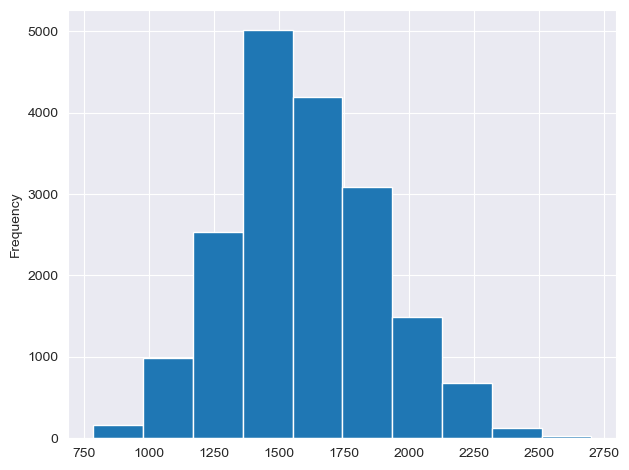

In [38]:
df['white_rating'].plot.hist();

Z podanego wykresu możemy zauważyć, że większość graczy jest z przedziału 1375-1500

Text(0, 0.5, 'Ilość obserwacji')

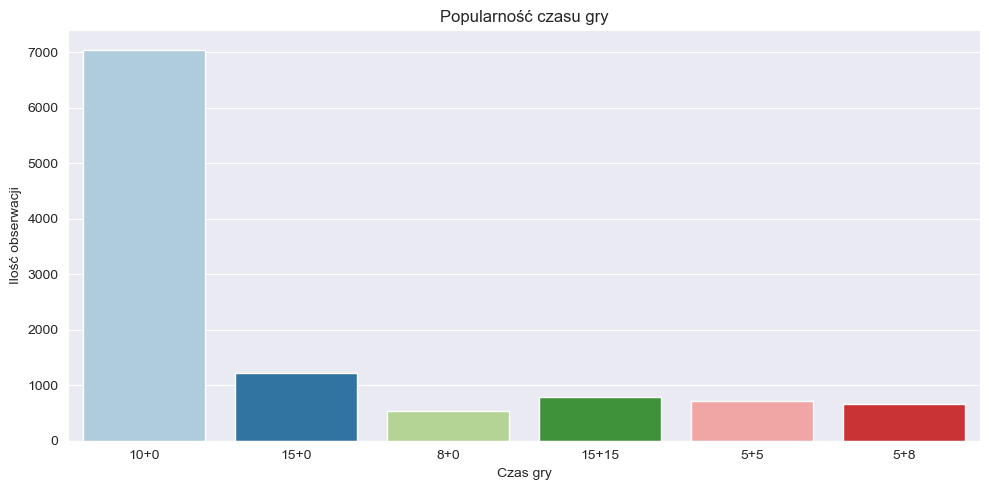

In [39]:
value_counts = df['increment_code'].value_counts()
filtered_df = df[df['increment_code'].isin(value_counts[value_counts > 500].index)]
fig, axes = plt.subplots(figsize=(10,5))
g = sns.countplot(x='increment_code', data=filtered_df, palette='Paired')
g.set_title('Popularność czasu gry')
g.set_xlabel('Czas gry')
g.set_ylabel('Ilość obserwacji')


Z podanego wykresu możemy zauważyć że najbardziej popularnym czasem gry jest 10+0

Text(0, 0.5, 'Ilość obserwacji')

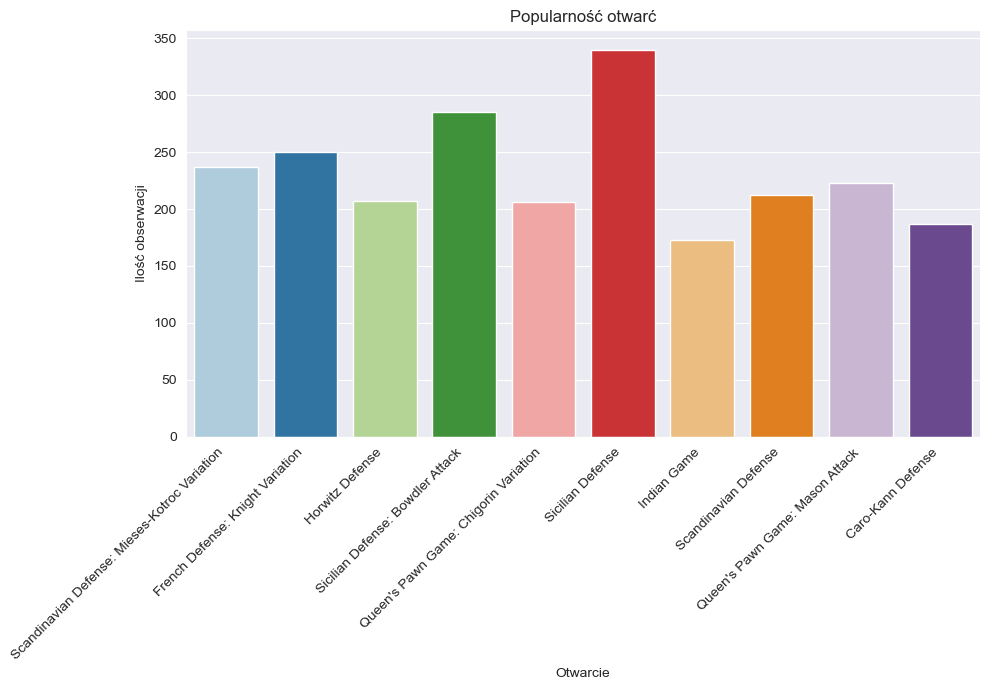

In [40]:
filtered_df = df[(df['opening_ply'] >= 2) & (df['opening_ply'] <= 4)]
value_counts = filtered_df['opening_name'].value_counts()
top_10_values = value_counts.nlargest(10).index
filtered_df = df[df['opening_name'].isin(top_10_values)]
fig, axes = plt.subplots(figsize=(10,7))
g = sns.countplot(x='opening_name', data=filtered_df, palette='Paired')

g.set_title('Popularność otwarć')
plt.xticks(rotation=45, ha="right")
g.set_xlabel('Otwarcie')
g.set_ylabel('Ilość obserwacji')


Filtrujemy dane żeby zakres otwarć był pokazany z przedziału od 2 do 4 ruchów teoretycznych i ograniczamy liczbę wyników do 10.
Najpopularniejszym debiutem jest obrona sycylijska.

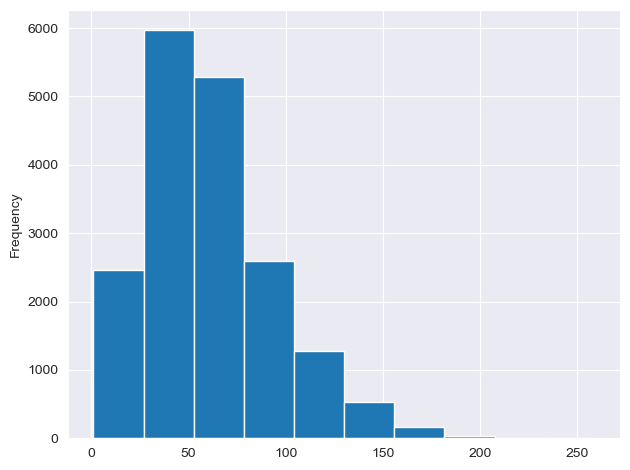

In [41]:
df['turns'].plot.hist();

Z podanego zakresu widzimy, że większość gier kończy się w zakresie 25-50 ruchów.

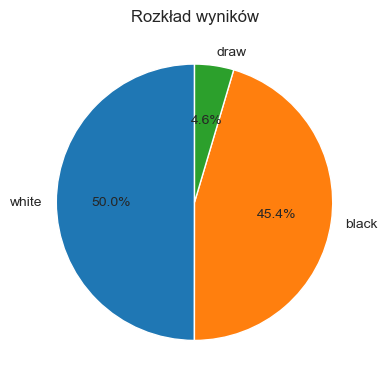

In [42]:
result_counts = df['winner'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Rozkład wyników')
plt.show()

Białe wygrały większość partii

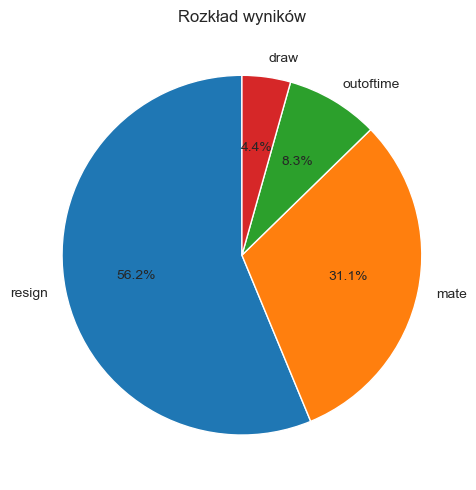

In [43]:
result_counts = df['victory_status'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90,)
plt.title('Rozkład wyników')
plt.show()